In [1]:
"""
항목 집합 ={i1, ..., in}=2의 n승 부분집합-1(공집합)
2의n승-1개 부분집합으로부터 연관규칙 생성(임계값 설정)
"""

'\n항목 집합 ={i1, ..., in}=2의 n승 부분집합-1(공집합)\n2의n승-1개 부분집합으로부터 연관규칙 생성(임계값 설정)\n'

In [2]:
import pandas as pd

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#TransactionEncoder: 길이가 일정치 않은 거래 데이터를 머신러닝 하기에 적절한
#형태의 배열로 변환해주는 api

In [6]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [8]:
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [9]:
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [10]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [12]:
#te_array -> 데이터프레임변환, 컬럼 이름은 te.columns_ 설정
pd.DataFrame(te_array, columns=te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [13]:
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [14]:
te.inverse_transform(te_array)

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [15]:
dataset=[['사과', '치즈', '생수'],
         ['생수', '딸기', '치즈', '고등어'],
         ['수박', '사과', '생수'],
         ['생수', '딸기', '치즈', '감자']
        ]

In [16]:
#데이터프레임으로 변환하시오
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
te_array

array([[False, False, False,  True,  True, False,  True],
       [False,  True,  True, False,  True, False,  True],
       [False, False, False,  True,  True,  True, False],
       [ True, False,  True, False,  True, False,  True]])

In [18]:
df=pd.DataFrame(te_array, columns=te.columns_)
df

,감자,고등어,딸기,사과,생수,수박,치즈
0,False,False,False,True,True,False,True
1,False,True,True,False,True,False,True
2,False,False,False,True,True,True,False
3,True,False,True,False,True,False,True


In [23]:
freq_itemsets=apriori(df, min_support=0.5, use_colnames=True)
#          ['사과', '치즈', '생수'],
#          ['생수', '딸기', '치즈', '고등어'],
#          ['수박', '사과', '생수'],
#          ['생수', '딸기', '치즈', '감자']
freq_itemsets

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(딸기, 생수)"
5,0.50,"(딸기, 치즈)"
6,0.50,"(사과, 생수)"
7,0.75,"(치즈, 생수)"
8,0.50,"(딸기, 치즈, 생수)"


In [25]:
from mlxtend.frequent_patterns import association_rules
association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)
#구글 코랩 사용도 괜찮음(회원 가입, 무료, 구글링 사용법)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
7,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
8,"(딸기, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
9,"(딸기, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


In [ ]:
# 뉴스 데이터 : 속리산 -> ???
# 깃대종 관련 논문 : 속리산 -> ???
# 속리산 -> 담비 규칙의 (지지도, 신뢰도, 향상도)

In [27]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [32]:
#dataset -> 데이터프레임 생성
#pd.DataFrame(dataset)
te=TransactionEncoder()
teArray=te.fit(dataset).transform(dataset)
df=pd.DataFrame(teArray, columns=te.columns_)
df
#최소 지지도가 0.6 이상인 항목집합을 출력하시오
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [51]:
fre_itemsets=apriori(df, min_support=0.6, use_colnames=True)
fre_itemsets
# support          itemsets           length
# 0.8               (Eggs)               1
# 0.8   	(Kidney Beans, Eggs)         2

fre_itemsets['length']=fre_itemsets['itemsets'].apply(lambda x:len(x))
fre_itemsets
# len(fre_itemsets.loc[1].itemsets)
# len(fre_itemsets.loc[10].itemsets)


#length가 2이면서 support가 0.8 이상인  항목 집합을 모두 출력하시오.
fre_itemsets[(fre_itemsets['length']==2) & (fre_itemsets['support']>=0.8)]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [54]:
fre_itemsets[fre_itemsets['itemsets']=={'Onion', 'Eggs'}]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [58]:
#Sparse 형태로 표현하여 메모리 낭비 해소
ohtArray=te.fit(dataset).transform(dataset, sparse=True)
ohtArray

sparsedf=pd.DataFrame.sparse.from_spmatrix(ohtArray, columns=te.columns_)
sparsedf

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
"""
conviction 

conv(X->Y) =  (1-s(Y)) / (1-c(X->Y))
Y없이 X가 발생한 비율(찾아낸 규칙이 얼마나 잘못되었는지를 확인)

(1-c(X->Y))  =  (s(X)-s(X합집합Y))  / s(X)

(1-s(Y)):Y가 발생하지 않은 비율
conv(X->Y)는 Y가 발생되지 않은(1-s(Y)) 비율이  X가 발생된것 중 Y와 동시에 일어나지 않은
(1-c(X->Y))사건의 비율의 몇 배인가를 의미

EX) 웹문서
conv(코딩 -> 파이썬) : 전체 웹 문서에서  코딩이 없는 비율은  매우 높을 것이다.
파이썬이 있는 문서에서 코딩이 없는 문서는 그다지 많지 않을 것이다.
따라서, conv(코딩 -> 파이썬)은 1보다 매우 큰 값을 갖게 될 것이다.
따라서 코딩과 파이썬의 상관 관계는 매우 높을 것이다.



"""

In [61]:
data=pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.shape

(7501, 20)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [70]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data[0]

0              shrimp
1             burgers
2             chutney
3              turkey
4       mineral water
            ...      
7496           butter
7497          burgers
7498          chicken
7499         escalope
7500             eggs
Name: 0, Length: 7501, dtype: object

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #pip install wordcloud

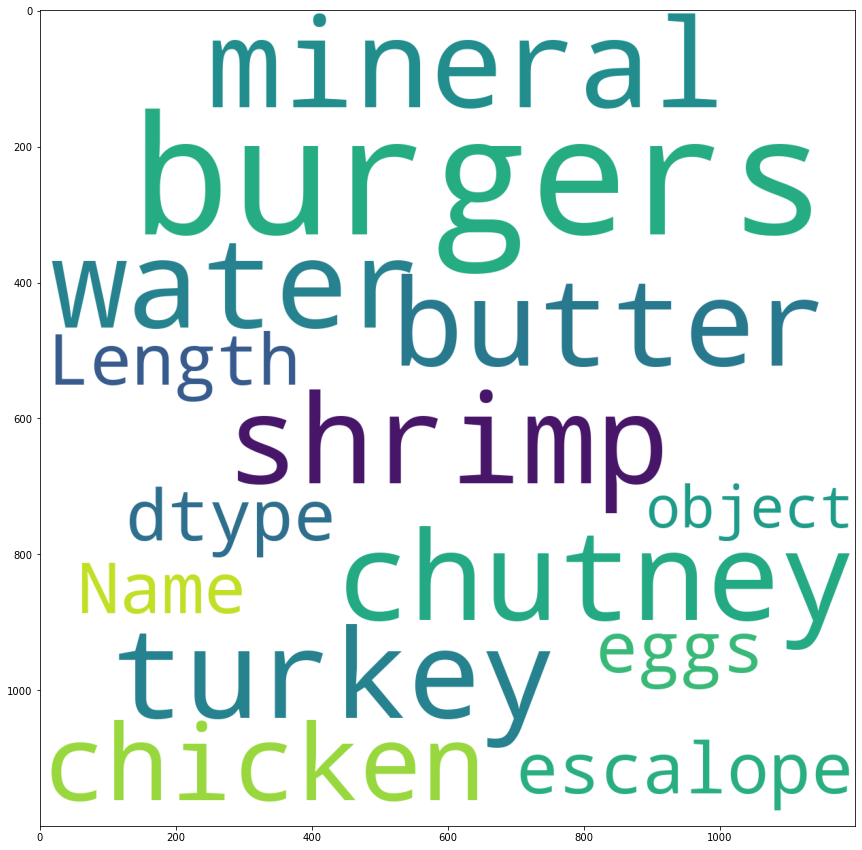

In [68]:
plt.rcParams['figure.figsize']=(15,15) 
wordcloud=WordCloud(background_color='white', width=1200, 
          height=1200, max_words=120).generate(str(data[0]))
plt.imshow(wordcloud)
#그림 크기(가로, 세로 ) 인치 단위


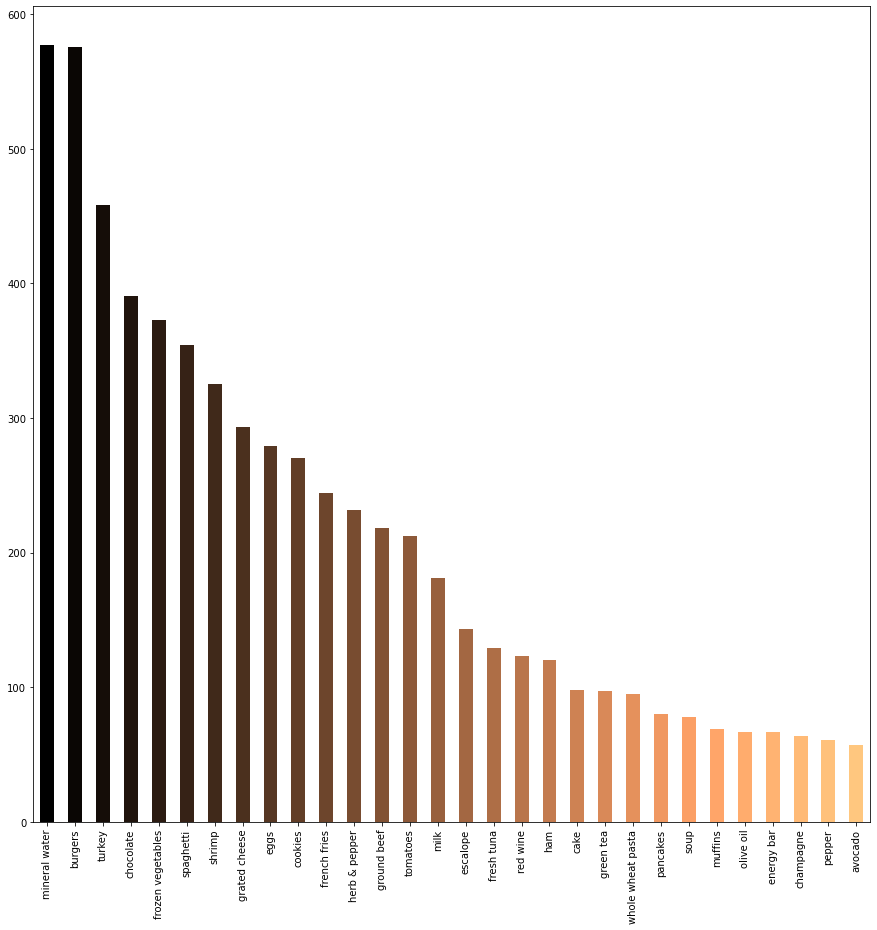

In [76]:
import numpy as np
data[0].value_counts().head(30).plot.bar(color=plt.cm.copper(np.linspace(0,1,30)))

In [ ]:
groceries.csv
market.csv
연관규칙(지지도, 신뢰도, 향상도)
#의미있는 번들상품 아이템을 검색
#특정 고객에게 홍보하기
{돼지고기} -> {상추}   향상도:2
    
구매했던 상품을 입력하세요?
돼지고기
추천하고 싶은 상품은 상추입니다



In [78]:
pd.__version__

'1.0.5'